## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [ ]:
import numpy as np

n = 10  # количество наблюдений

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

b = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
a = np.mean(y) - b*np.mean(x)
print(f'Коэффициенты регрессии: a={a}, b={b}')

r = b * np.std(x) / np.std(y)
R2 = r**2
print('Коэффициент корреляции', r)
print('Коэффициент детерминации', R2)

Коэффициенты регрессии: a=444.1773573243596, b=2.620538882402765
Коэффициент корреляции 0.8874900920739162
Коэффициент детерминации 0.7876386635293682


С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью кредитного скоринга:

In [ ]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [ ]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Так как $\overline {A}$ равна 11%, модель хорошо описывает эмпирические данные. Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [ ]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 10 - 2 = 8$ табличное значение критерия: $F_{кр} = 5.32$.

Так как $F_{факт} = 29.67 > F_{кр} = 5.32$, уравнение регрессии статистически значимо.

Поместим исходные и предсказанные данные в датафрейм **df** и отсортируем его по значению x:

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')

Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

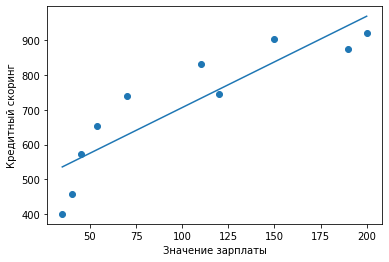

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Значение зарплаты')
plt.ylabel('Кредитный скоринг')
plt.show()

## Задача 1.б

Решим аналогичную задачу, но без расчета intercept.

In [ ]:
import numpy as np

n = 10  # количество наблюдений

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

a = np.mean(x*y) / np.mean(x**2)
print(f'Коэффициент регрессии: a={a}')

Коэффициент регрессии: a=5.889820420132688


С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью кредитного скоринга:

In [ ]:
y_pred = a * x
y_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [ ]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

33.225451661167305

Так как $\overline {A}$ равна 33%, модель хуже описывает эмпирические данные, чем вариант с intercept.

Поместим исходные и предсказанные данные в датафрейм **df** и отсортируем его по значению x:

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')

Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

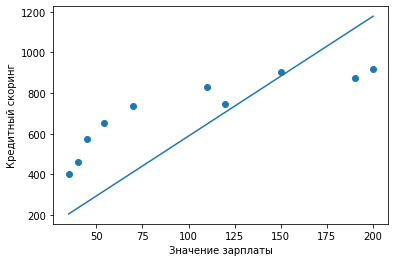

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Значение зарплаты')
plt.ylabel('Кредитный скоринг')
plt.show()

## Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [ ]:
import numpy as np


def mse(b1, x, y, n):
    return np.sum((b1*x-y)**2)/n

In [ ]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

alpha = 0.000001  # шаг градиентного спуска
n = 10  # количество наблюдений

b1 = 1

for i in range(5000):
    b1 -= alpha*(2/n)*np.sum((b1*x-y)*x)
    if i % 500 == 0:
        print(f'Iteration {i}, b1={b1}, mse={mse(b1, x, y, n)}')

Iteration 0, b1=1.1347302, mse=368017.9491755833
Iteration 500, b1=5.8898163455368975, mse=56516.85841594815
Iteration 1000, b1=5.8898204201291975, mse=56516.8584157194
Iteration 1500, b1=5.889820420132673, mse=56516.85841571943
Iteration 2000, b1=5.889820420132673, mse=56516.85841571943
Iteration 2500, b1=5.889820420132673, mse=56516.85841571943
Iteration 3000, b1=5.889820420132673, mse=56516.85841571943
Iteration 3500, b1=5.889820420132673, mse=56516.85841571943
Iteration 4000, b1=5.889820420132673, mse=56516.85841571943
Iteration 4500, b1=5.889820420132673, mse=56516.85841571943


Построим уравнение регрессии и посчитаем значения, предсказанные моделью кредитного скоринга:

In [ ]:
y_pred = b1 * x
y_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [ ]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

33.22545166116737

Поместим исходные и предсказанные данные в датафрейм **df** и отсортируем его по значению x:

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')

Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

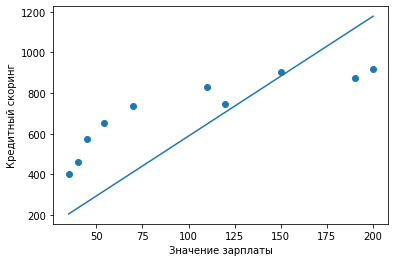

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Значение зарплаты')
plt.ylabel('Кредитный скоринг')
plt.show()

## Задача 3*

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (с intercept).

In [ ]:
import numpy as np


def mse2(b1, b2, x, y, n):
    return np.sum((b1*x+b2-y)**2)/n

In [ ]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

alpha = 0.00005  # шаг градиентного спуска
n = 10  # количество наблюдений

b1 = 100
b2 = 100

for i in range(1000000):
    b1_grad = alpha*(2/n)*np.sum((b1*x+b2-y)*x)
    b2_grad = alpha*(2/n)*np.sum((b1*x+b2-y))
    b1 -= b1_grad
    b2 -= b2_grad
    if i % 100000 == 0:
        print(f'Iteration {i}, b1={b1}, b2={b2}, mse={mse2(b1, b2, x, y, n)}')

Iteration 0, b1=-30.66583, b2=99.04699, mse=17719609.200831573
Iteration 100000, b1=2.821424174503612, b2=416.8847995298088, mse=6659.365060916854
Iteration 200000, b1=2.636436832945594, b2=442.01743944551737, mse=6471.597610192917
Iteration 300000, b1=2.6217970373867314, b2=444.0064226219965, mse=6470.42161292859
Iteration 400000, b1=2.6206384520900294, b2=444.1638296468686, mse=6470.414247596846
Iteration 500000, b1=2.6205467622925833, b2=444.1762867514669, mse=6470.414201467393
Iteration 600000, b1=2.620539506012884, b2=444.1772725998134, mse=6470.414201178484
Iteration 700000, b1=2.6205389317549366, b2=444.1773506193043, mse=6470.41420117667
Iteration 800000, b1=2.6205388863084735, b2=444.17735679372464, mse=6470.414201176658
Iteration 900000, b1=2.620538882711903, b2=444.17735728235965, mse=6470.414201176663


Построим уравнение регрессии и посчитаем значения, предсказанные моделью кредитного скоринга:

In [ ]:
y_pred = b1 * x + b2
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.28513381,
       548.99891262, 627.61507909, 585.68645697, 837.25818969,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [ ]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.469251843571

Поместим исходные и предсказанные данные в датафрейм **df** и отсортируем его по значению x:

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')

Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

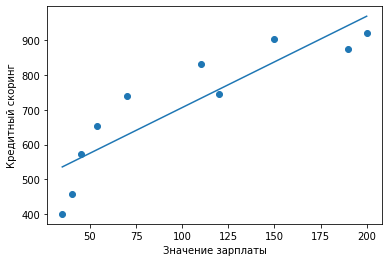

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Значение зарплаты')
plt.ylabel('Кредитный скоринг')
plt.show()